In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [8]:
warnings.filterwarnings("ignore")

In [114]:
sns.set(palette = 'deep', context = 'poster')

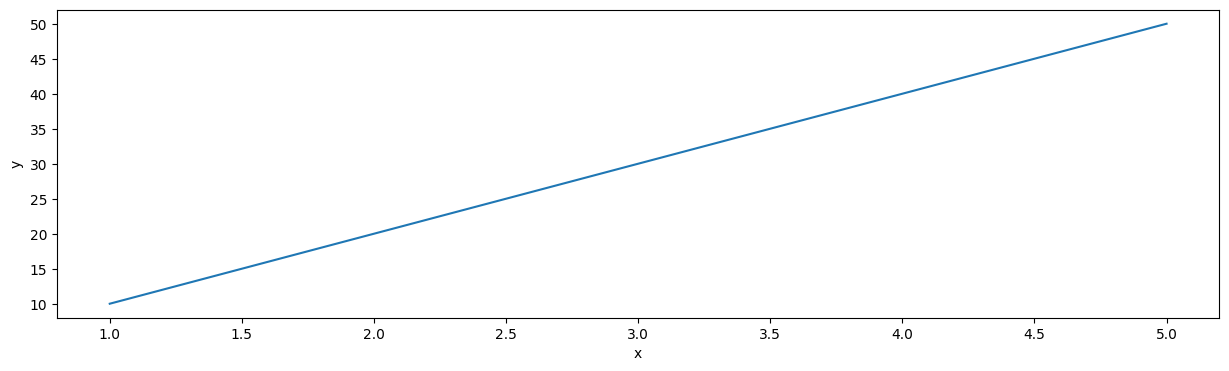

In [33]:
data = pd.DataFrame({"x":[1,2,3,4,5], "y" : [10,20,30,40,50]})
plt.figure(figsize = (15, 4))
sns.lineplot(data = data, x = "x", y = "y")
plt.show()

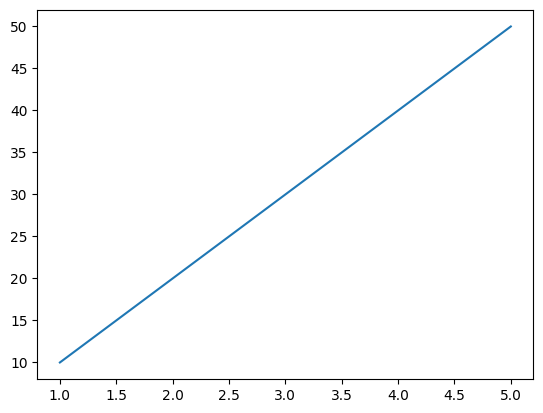

In [35]:
plt.plot(data["x"],data["y"])
plt.show()

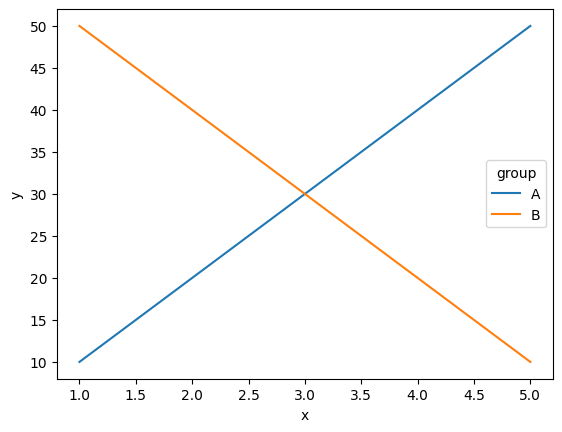

In [25]:
data = pd.DataFrame(
    {
        "x":[1,2,3,4,5,1,2,3,4,5], 
        "y" : [10,20,30,40,50,50,40,30,20,10],
        "group" : ["A","A","A","A","A","B","B","B","B","B"]
    }
)

sns.lineplot(data = data, x = "x", y = "y", hue = 'group')
plt.show()

<Axes: xlabel='x', ylabel='y'>

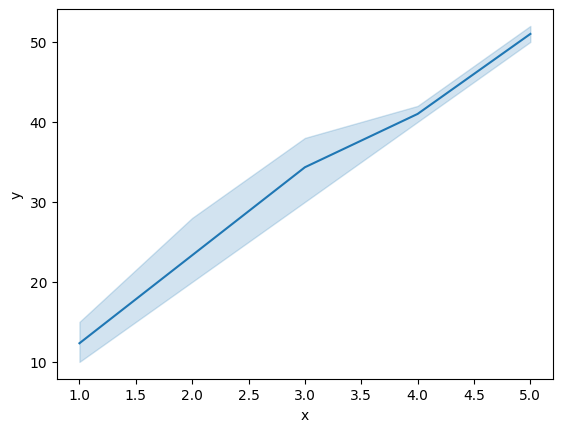

In [21]:
data = pd.DataFrame(
    {
        "x":[1,2,3,4,5]*3, 
        "y" : [10,20,30,40,50,15,22,38,41,52,12,28,35,42,51]
    }
)

sns.lineplot(data = data, x = "x", y = "y", ci = 95)

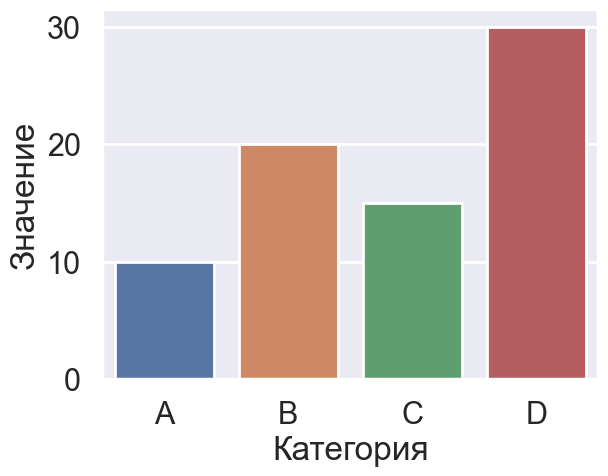

In [115]:
data = pd.DataFrame({"Категория" : ['A', 'B', 'C', 'D'], "Значение": [10, 20, 15, 30]})
sns.barplot(data = data, x = 'Категория', y = 'Значение')
plt.show()

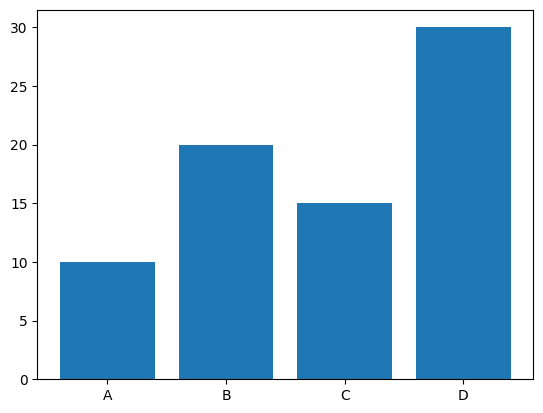

In [38]:
plt.bar(x = data["Категория"], height = data["Значение"])
plt.show()

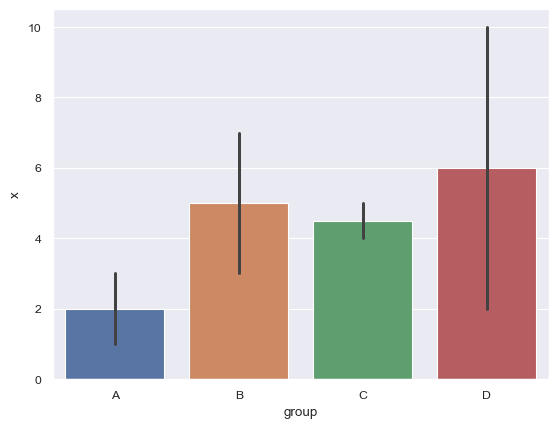

In [113]:
data = pd.DataFrame(
    {
        "x":[1,2,3, 3, 5, 7, 4, 4.5, 5, 2,6,10], 
        "group" : ["A","A","A","B","B","B","C","C","C","D","D","D"]
    }
)

sns.barplot(data = data, x = 'group', y = 'x')
plt.show()

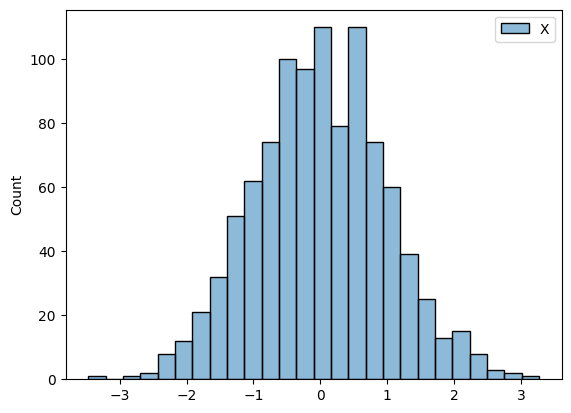

In [46]:
data = pd.DataFrame({'X' : np.random.randn(1000)})
sns.histplot(data)
plt.show()

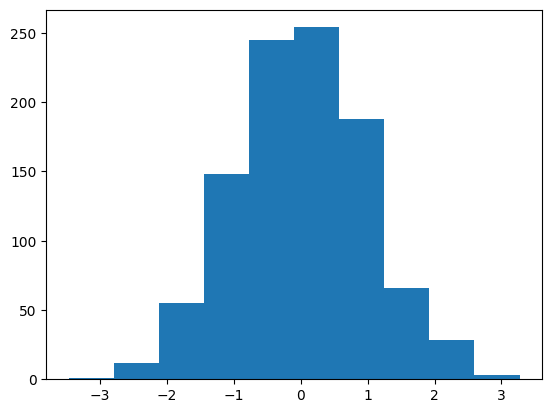

In [49]:
plt.hist(data['X'])
plt.show()

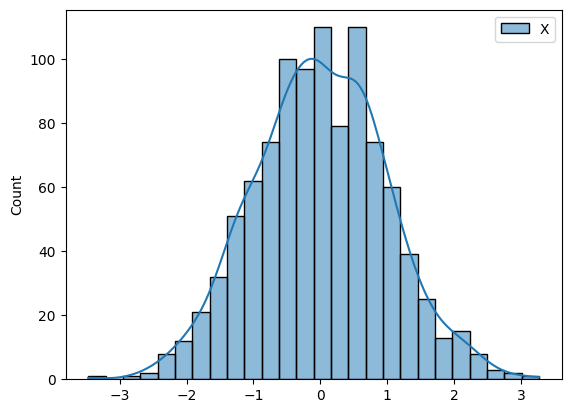

In [50]:
sns.histplot(data, kde = True)
plt.show()

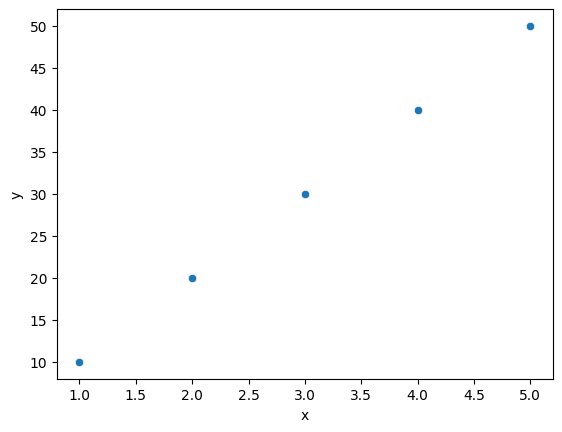

In [52]:
data = pd.DataFrame({"x":[1,2,3,4,5], "y" : [10,20,30,40,50]})
sns.scatterplot(data = data, x = 'x', y = 'y')
plt.show()

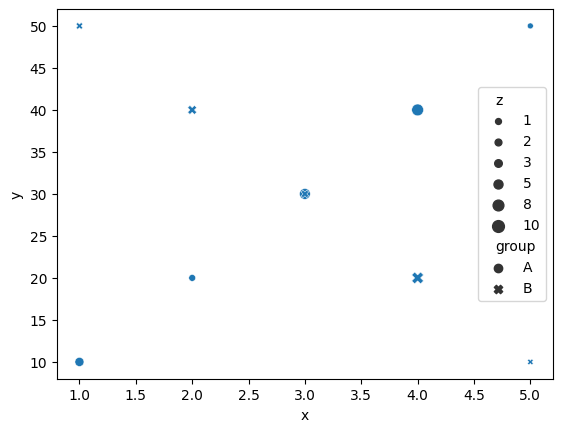

In [59]:
data = pd.DataFrame(
    {
        "x":[1,2,3,4,5,1,2,3,4,5], 
        "y" : [10,20,30,40,50,50,40,30,20,10],
        "z": [5, 2, 8, 10, 1, 2, 5, 3, 10, 1],
        "group" : ["A","A","A","A","A","B","B","B","B","B"]
    }
)
sns.scatterplot(data = data, x = 'x', y = 'y',  style = 'group', size = 'z')
plt.show()

[]

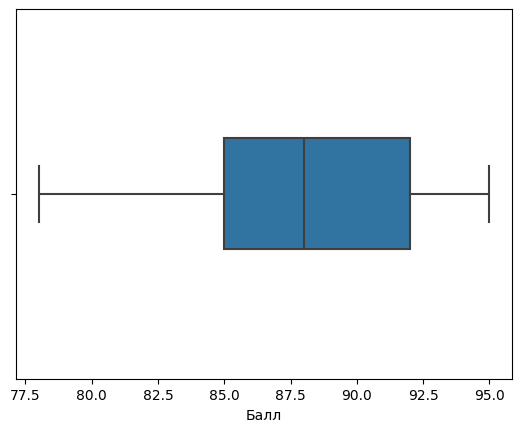

In [62]:
data = pd.DataFrame({
    'Студент' : ['Студент1', 'Студент2', 'Студент3', 'Студент4', 'Студент5'],
    'Балл' : [85, 92, 78, 88, 95]
})

sns.boxplot(x = 'Балл', data = data, width = 0.3)
plt.plot()

<Axes: xlabel='group', ylabel='variable'>

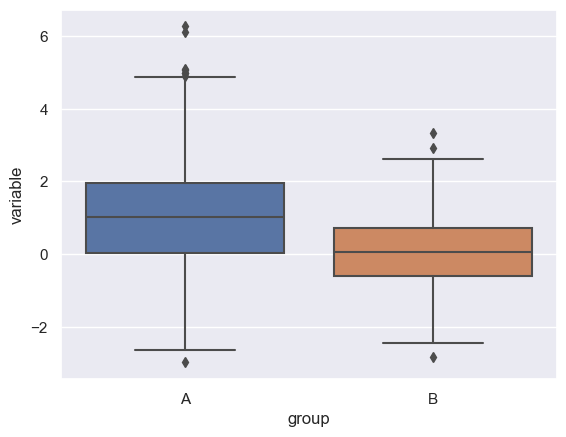

In [107]:
data = pd.DataFrame({
    'variable' : np.hstack([np.random.randn(1000)*1.5 + 1, np.random.randn(1000)]),
    'group' : ['A']*1000 + ['B']*1000
})

sns.boxplot(x = 'group', y = 'variable', data = data, orient = 'v')

<Axes: xlabel='variable', ylabel='Count'>

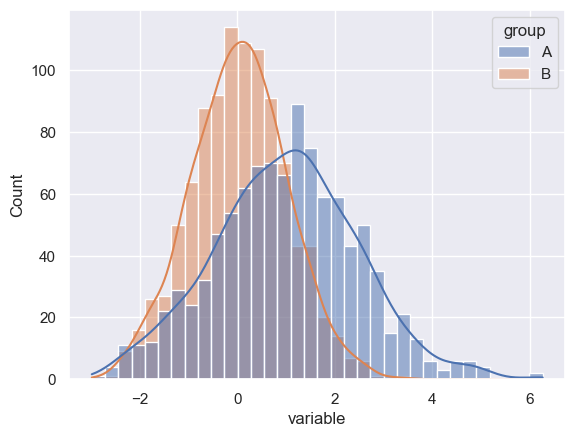

In [108]:
sns.histplot(x = 'variable', data = data, hue = 'group', kde = True)

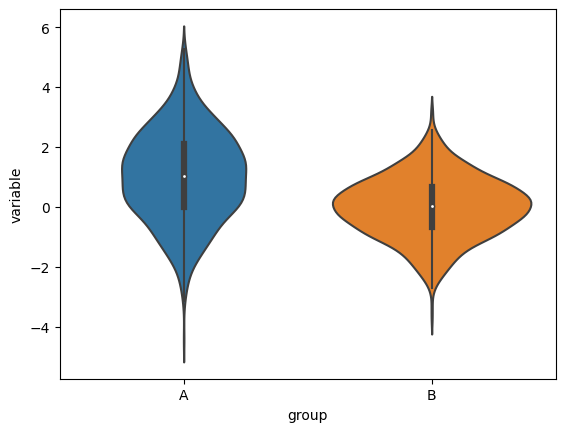

In [83]:
sns.violinplot(x = 'group', y = 'variable', data = data)
plt.show()

In [109]:
data = pd.DataFrame(
    {
        "x":[1,2,3, 3, 5, 7, 4, 4.5, 5, 2,6,10], 
        "group1" : ["A","A","A","A","B","B","B","B","C","C","C","C"],
        "group2" : ["X","Y","X","Y","X","Y","X","Y","X","Y","X","Y"]
    }
)

<Axes: ylabel='group1'>

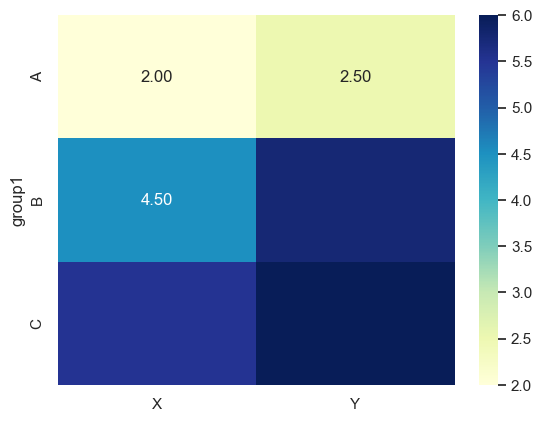

In [110]:
df = data.groupby(['group1', 'group2']).agg({'x':'mean'}).unstack()
df.columns = ['X', 'Y']
sns.heatmap(df, cmap = 'YlGnBu', annot = True, fmt = ".2f")

### Пример на реальных данных

In [118]:
df_sales = pd.read_csv(r"C:\Courses\Innopolis\2024\ПИШ\Часть 2.2\Лекция 18\sales_data.csv")
df_items = pd.read_csv(r"C:\Courses\Innopolis\2024\ПИШ\Часть 2.2\Лекция 18\items.csv")
df_categories = pd.read_csv(r"C:\Courses\Innopolis\2024\ПИШ\Часть 2.2\Лекция 18\item_categories.csv")
df_shops = pd.read_csv(r"C:\Courses\Innopolis\2024\ПИШ\Часть 2.2\Лекция 18\shops.csv")

df_all = (
    df_sales
    .merge(right = df_items, how = 'left', left_on = 'item_id', right_on = 'item_id')
    .merge(right = df_categories, how = 'left', left_on = 'item_category_id', right_on = 'item_category_id')
    .merge(right = df_shops, how = 'left', left_on = 'shop_id', right_on = 'shop_id')
)

df_all['date'] = pd.to_datetime(df_all['date'], format = "%d.%m.%Y")
df_all['date_block_num'] = df_all['date_block_num'].astype(str)

for column in df_all.columns:
    if 'id' in column:
        df_all[column] = df_all[column].astype(str)
        
df_all = df_all[['date', 'shop_name', 'item_category_name', 'item_name', 'item_price', 'item_cnt_day']]
df_all['sales'] = df_all['item_price']*df_all['item_cnt_day']
df_all.head()

,date,shop_name,item_category_name,item_name,item_price,item_cnt_day,sales
0,2013-01-02,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray,ЯВЛЕНИЕ 2012 (BD),999.00,1.0,999.00
1,2013-01-03,"Москва ТРК ""Атриум""",Музыка - Винил,DEEP PURPLE The House Of Blue Light LP,899.00,1.0,899.00
2,2013-01-05,"Москва ТРК ""Атриум""",Музыка - Винил,DEEP PURPLE The House Of Blue Light LP,899.00,-1.0,-899.00
3,2013-01-06,"Москва ТРК ""Атриум""",Музыка - Винил,DEEP PURPLE Who Do You Think We Are LP,1709.05,1.0,1709.05
4,2013-01-15,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),1099.00,1.0,1099.00


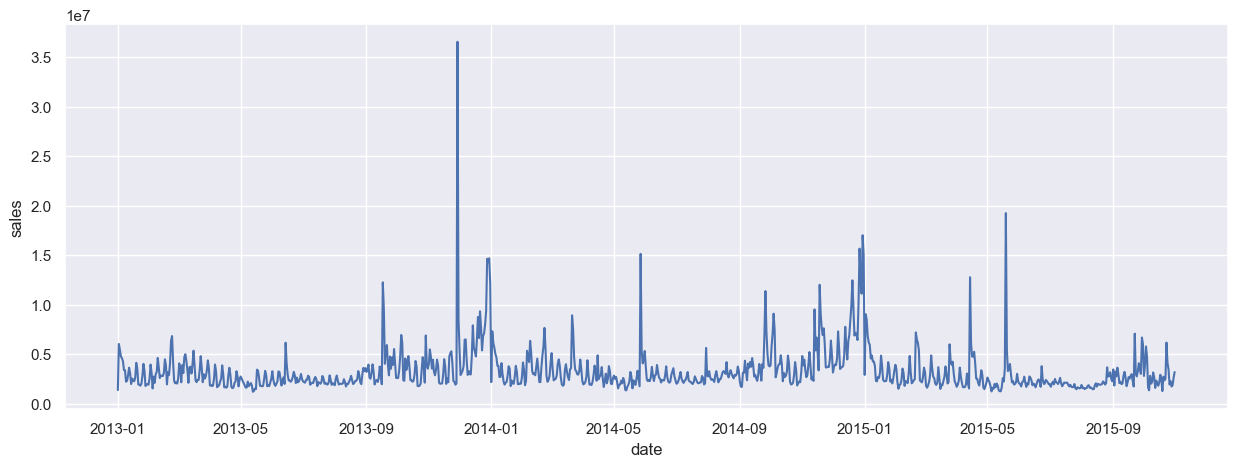

In [122]:
df1 = df_all.groupby('date')['sales'].sum()

plt.figure(figsize = (15,5))
sns.set(context = 'notebook')
sns.lineplot(df1)
plt.show()

In [132]:
df2.head()

,shop_name,date,sales
0,"Москва ТРК ""Атриум""",2013-01-02,345174.13
1,"Москва ТРК ""Атриум""",2013-01-03,249421.00
2,"Москва ТРК ""Атриум""",2013-01-04,233731.00
3,"Москва ТРК ""Атриум""",2013-01-05,226029.00
4,"Москва ТРК ""Атриум""",2013-01-06,273742.00


In [140]:
df_all.groupby('item_category_name')['sales'].sum().sort_values().tail(10)

item_category_name
Программы - Для дома и офиса           8.708593e+07
Кино - Blu-Ray                         9.047873e+07
Музыка - CD локального производства    1.000226e+08
Игры PC - Дополнительные издания       1.364191e+08
Кино - DVD                             1.699442e+08
Игры PC - Стандартные издания          2.575193e+08
Игры - XBOX 360                        2.596191e+08
Игровые консоли - PS4                  2.922398e+08
Игры - PS4                             3.730103e+08
Игры - PS3                             4.120503e+08
Name: sales, dtype: float64

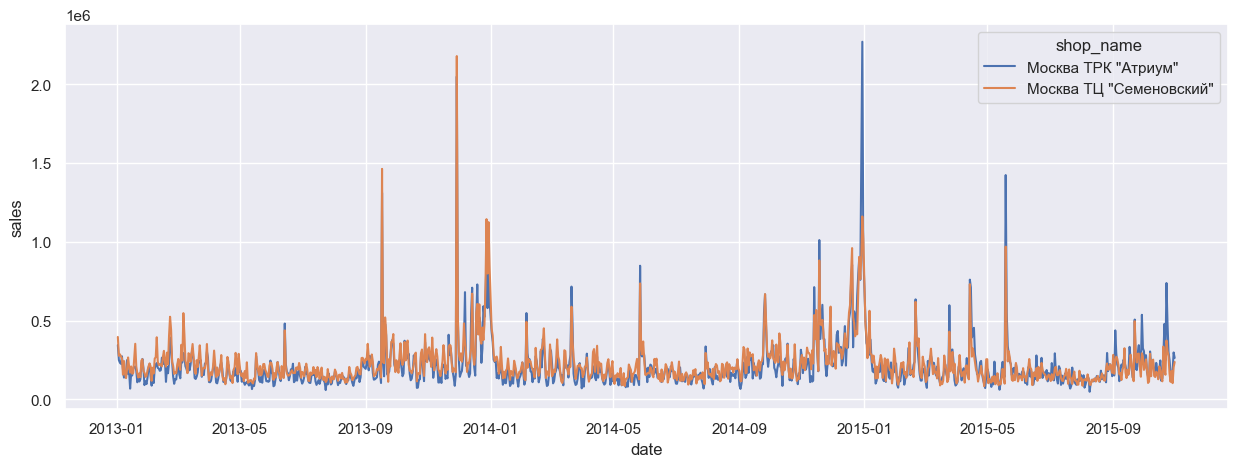

In [133]:
df2 = (
    df_all[df_all['shop_name'].isin(['Москва ТЦ "Семеновский"', 'Москва ТРК "Атриум"'])]
    .groupby(['shop_name', 'date'])['sales'].sum()
    .reset_index()
)

plt.figure(figsize = (15,5))
sns.lineplot(df2, x = 'date', y = 'sales', hue = 'shop_name' )
plt.show()

<Axes: xlabel='date', ylabel='sales'>

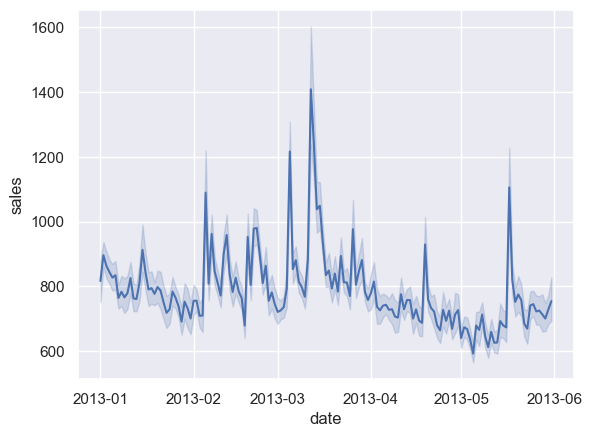

In [135]:
sns.lineplot(data = df_all[df_all['date'] < '2013-06'], x = 'date', y = 'sales')

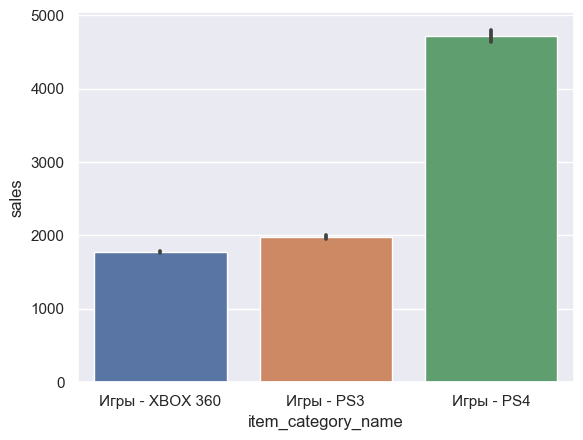

In [144]:
df3 = df_all[df_all['item_category_name'].isin(["Игры - XBOX 360", "Игры - PS4", "Игры - PS3"])]
sns.barplot(data = df3, x = 'item_category_name', y = 'sales')
plt.show()

In [168]:
df6

item_category_name,Игры - PS3,Игры - PS4,Игры - XBOX 360
shop_name,,,
"Москва ТРК ""Атриум""",23.391177,28.480354,12.736679
"Москва ТЦ ""Семеновский""",26.485251,23.619431,14.829327


<Axes: xlabel='item_category_name', ylabel='shop_name'>

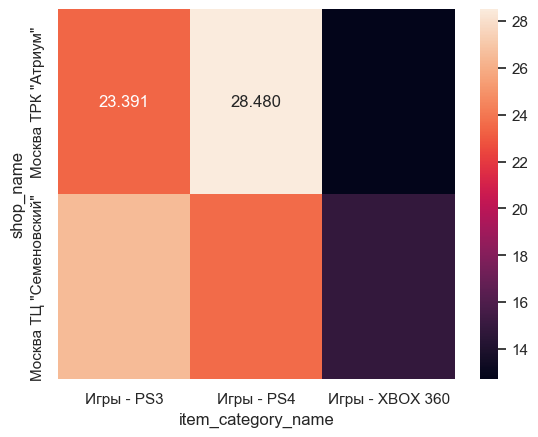

In [167]:
df6 = df3[df3['shop_name'].isin(['Москва ТЦ "Семеновский"', 'Москва ТРК "Атриум"'])]
df6 = df6.groupby(['shop_name', 'item_category_name'])['sales'].sum().unstack()/1000000
sns.heatmap(df6, annot = True, fmt = '.3f')

In [151]:
sns.histplot?

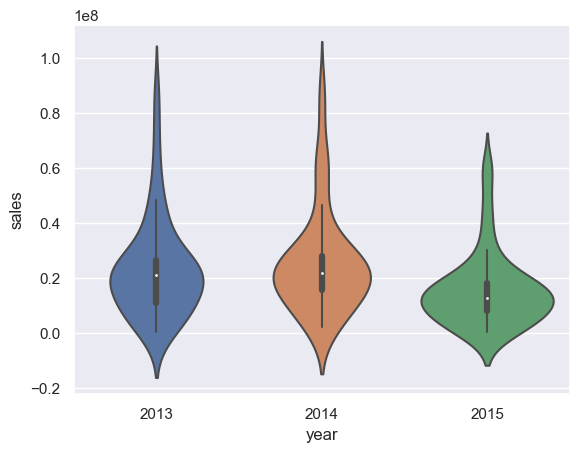

In [153]:
sns.set()
df_all['year'] = df_all['date'].dt.year
df4 = df_all.groupby(['year','shop_name'])['sales'].sum().reset_index()
sns.violinplot(data = df4, x = 'year', y = 'sales')
plt.show()

,date,shop_name,item_category_name,item_name,item_price,item_cnt_day,sales,year
0,2013-01-02,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray,ЯВЛЕНИЕ 2012 (BD),999.00,1.0,999.00,2013
1,2013-01-03,"Москва ТРК ""Атриум""",Музыка - Винил,DEEP PURPLE The House Of Blue Light LP,899.00,1.0,899.00,2013
2,2013-01-05,"Москва ТРК ""Атриум""",Музыка - Винил,DEEP PURPLE The House Of Blue Light LP,899.00,-1.0,-899.00,2013
3,2013-01-06,"Москва ТРК ""Атриум""",Музыка - Винил,DEEP PURPLE Who Do You Think We Are LP,1709.05,1.0,1709.05,2013
4,2013-01-15,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),1099.00,1.0,1099.00,2013
...,...,...,...,...,...,...,...,...
2935844,2015-10-10,"Москва ТРК ""Атриум""",Музыка - CD локального производства,V/A Nu Jazz Selection (digipack),299.00,1.0,299.00,2015
2935845,2015-10-09,"Москва ТРК ""Атриум""",Музыка - CD локального производства,V/A The Golden Jazz Collection 1 2CD,299.00,1.0,299.00,2015
2935846,2015-10-14,"Москва ТРК ""Атриум""",Музыка - CD локального производства,V/A The Best Of The 3 Tenors,349.00,1.0,349.00,2015
2935847,2015-10-22,"Москва ТРК ""Атриум""",Музыка - MP3,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),299.00,1.0,299.00,2015


In [155]:
df5 = pd.read_csv(r"https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Air%20Quality%20Missing%20Data.csv")
df5

,Date,Ozone,Solar,Wind,Temp
0,01-05-1976,41.0,190.0,7.4,67
1,02-05-1976,36.0,118.0,8.0,72
2,03-05-1976,12.0,149.0,12.6,74
3,04-05-1976,18.0,313.0,11.5,62
4,05-05-1976,NaN,NaN,14.3,56
...,...,...,...,...,...
148,26-09-1976,30.0,193.0,6.9,70
149,27-09-1976,NaN,145.0,13.2,77
150,28-09-1976,14.0,191.0,14.3,75
151,29-09-1976,18.0,131.0,8.0,76


<Axes: xlabel='Ozone', ylabel='Solar'>

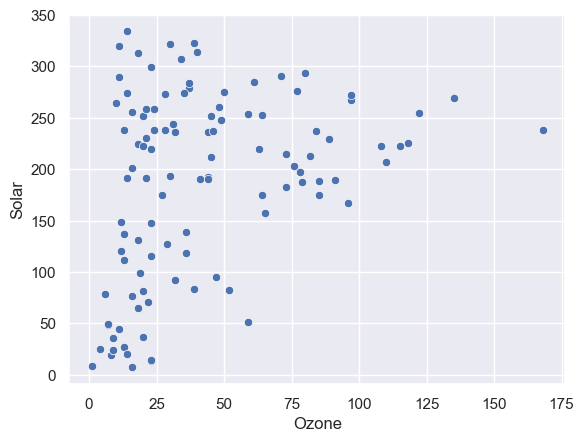

In [157]:
sns.scatterplot(data = df5, x = 'Ozone', y = 'Solar')

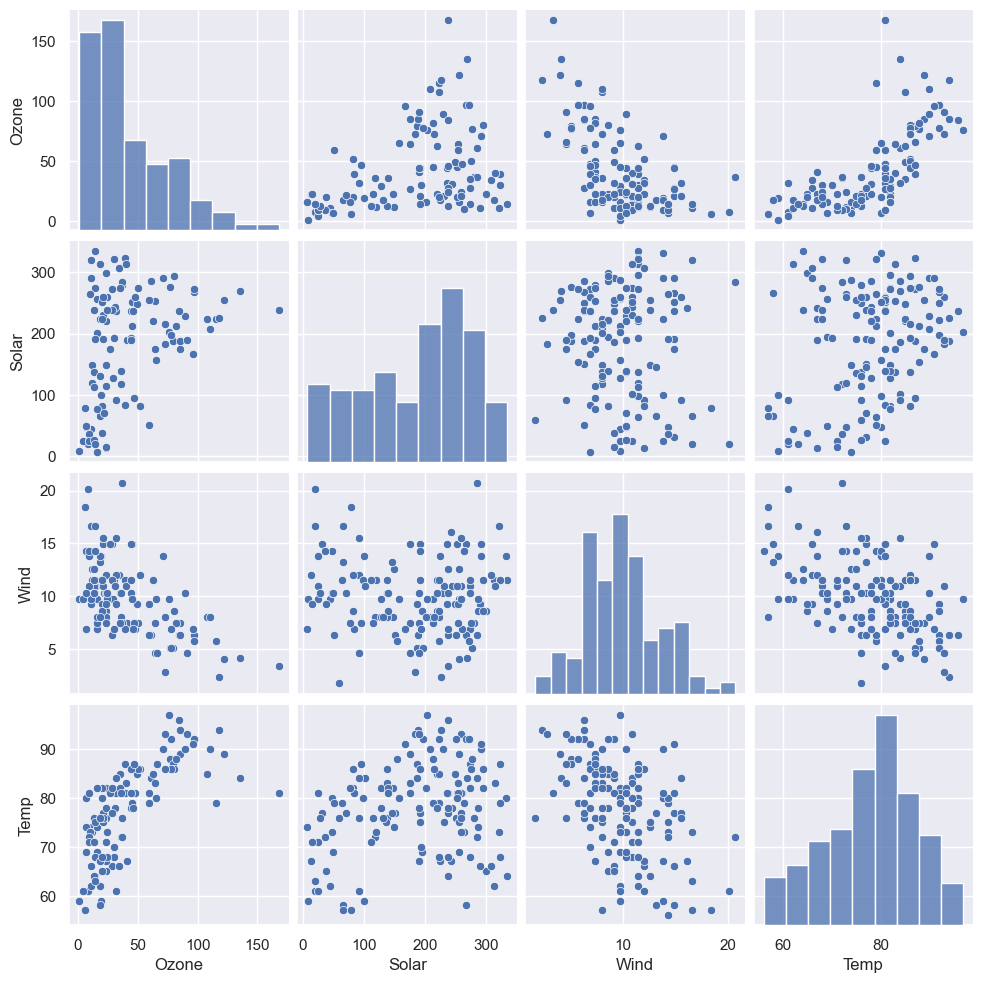

In [156]:
sns.pairplot(df5[["Ozone", "Solar", "Wind", "Temp"]])